In [1]:
#import necessary packages

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import matplotlib.pyplot as plt
import time

## Input Data:
Training and testing data are defined and training data is split into train and validation dataset

In [2]:
#Input data
data=np.load("/Users/gardasnagarjun/Downloads/datasets/bi-class/digit.npz", mmap_mode='r')
X_train=data['train_X'].astype('float32')
train_Y=data['train_Y'].astype('long')
X_test,test_Y=data['test_X'].astype('float32'),data['test_Y'].astype('long')
X_train

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  3., ..., 16.,  9.,  0.],
       [ 0.,  0.,  3., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ..., 15.,  2.,  0.],
       [ 0.,  0.,  2., ..., 16., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [3]:
train_Y

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

In [4]:
#Splitting into train, validation dataset
#X_train:main training data
#train_X: training data after splitting into train,validation data
train_X,val_X,train_y,val_Y=train_test_split(X_train,train_Y,test_size=0.2)

print(len(train_X))
print(len(val_X))

640
160


In [5]:
#checking the shape
print(train_X.shape,val_X.shape,train_y.shape,val_Y.shape)
print(len(X_train))

(640, 64) (160, 64) (640,) (160,)
800


In [6]:
'''Dataloader for various datasets'''
#Construct main,train,validation and test datasets for torch.util.data.dataloader:

#main_data is the whole training data to input it with the best model
main_data=[]
for i in range(len(X_train)):
    X_train.astype('float32')
    train_Y.astype('long')
    main_data.append([X_train[i],train_Y[i]])
    
mainloader=torch.utils.data.DataLoader(main_data,shuffle=True,batch_size=1)
i4,l4=next(iter(mainloader))
print(i4.shape)

#train_data is the train dataset after splitting:
train_data = []
for i in range(len(train_X)):
    train_X.astype('float32')
    train_y.astype('long')
    train_data.append([train_X[i], train_y[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=2)
i1, l1 = next(iter(trainloader))
print(i1.shape)

#val_data is the validation dataset and valloader is the dataloader for it.
val_data=[]
for i in range(len(val_X)):
    val_X.astype('float32')
    val_Y.astype('long')
    val_data.append([val_X[i], val_Y[i]])

valloader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=1)
i2, l2 = next(iter(valloader))
print(i2.shape)

#test_data and its loader is of complete testing dataset.
test_data=[]
for i in range(len(X_test)):
    X_test.astype('float32')
    test_Y.astype('long')
    test_data.append([X_test[i],test_Y[i]])
    
testloader=torch.utils.data.DataLoader(test_data,shuffle=False)

i3,l3=next(iter(testloader))
print(i3.shape)

torch.Size([1, 64])
torch.Size([2, 64])
torch.Size([1, 64])
torch.Size([1, 64])


In [7]:
print(len(trainloader))
print(len(valloader))
print(len(testloader))
for i,j in enumerate(valloader):
    print(i,j)
    break

320
160
200
0 [tensor([[ 0.,  0.,  9., 13.,  7.,  0.,  0.,  0.,  0.,  0., 12., 16., 16.,  2.,
          0.,  0.,  0.,  0., 12., 13., 16.,  6.,  0.,  0.,  0.,  0.,  6., 16.,
         16., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  3.,  0.,  0.,  0.,
          0.,  0.,  0.,  9., 10.,  0.,  0.,  0.,  3.,  7., 12., 14., 16.,  2.,
          0.,  0.,  7., 12., 12., 12., 11.,  0.]]), tensor([1])]


In [8]:
'''Neural Network Model'''

#Define the model of your Neural Network:
# one hidden layer with input as features of the data and the labels as output

#input=64 features
#n_hidden= Number of hidden nodes
#Output=2 classes

#Activation used: ReLu function
class One_hidden(nn.Module):
    def __init__(self,n_hidden,n_output=2,n_feature=64):
        super(One_hidden,self).__init__()
        self.hidden=nn.Linear(n_feature,n_hidden)
        self.output=nn.Linear(n_hidden,n_output)

        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.output(x)
        
        return x



In [9]:
# to check whether the model is defined or not
net_10=One_hidden(10)
print(net_10)

One_hidden(
  (hidden): Linear(in_features=64, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=2, bias=True)
)


In [13]:
# Train the model
def train_with_steps(net,trainloader):
    # Loss Criterion and Optimizer:
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    #torch.manual_seed(0)
    n_total_steps = len(trainloader)
    num_epochs=20
    
    for epoch in range(num_epochs):
        for i,(x,y) in enumerate(trainloader):
            net.zero_grad()
            
            # Forward pass    
            output = net(x)
            loss = criterion(output, y)
        
        
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            if (i+1) % 16 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}],Step:[{i+1}/{n_total_steps}], Loss: {loss.item():.5f}')
                
    acc=accuracy(net,valloader)
    return acc
            
 #Calculate Accuracy:      
def accuracy(net,valloader):
    net.eval()
    with torch.no_grad():
        n_correct=0
        n_samples=0
        for x,y in valloader:
            output=net(x)
            _,predicted=torch.max(output.data,1)
            n_samples+=y.size(0)
            n_correct+=(predicted==y).sum().item()
            
        acc=100.0* n_correct/n_samples
        print(f'Accuracy of the network for val data: {acc} %')
        return acc

In [18]:
def accuracy_test(net,testloader):
    with torch.no_grad():
        net.eval()
        n_correct = 0
        n_samples = 0
        for z, y in testloader:
            outputs = net(z)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y.size(0)
            n_correct += (predicted == y).sum().item()
            
        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network for test data: {acc} %')

In [ ]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train_with_steps(net,trainloader)
    
print(storage)

In [ ]:
net_best=One_hidden(7)
print(net_best)

In [ ]:
train_with_steps(net_best,trainloader)

In [ ]:
accuracy_test(net_best,testloader)

## Train the model through average loss per epoch:

In [14]:
def model_train(net,trainloader):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # number of epochs to train the model
    n_epochs = 30  # suggest training between 20-50 epochs
    loss_values=[]

    for epoch in range(n_epochs):
    # monitor training loss
        train_loss = 0.0
    
    ###################
    # train the model #
    ###################
        for data, target in trainloader:
        # clear the gradients of all optimized variables
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = net(data)
        # calculate the loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update running training loss
            train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
        train_loss = train_loss/len(trainloader.dataset)
        loss_values.append(train_loss)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))
    plt.plot(loss_values) #plot
    acc=accuracy(net,valloader) # get accuracy
    return acc

In [11]:
model_train(net_best,trainloader)

NameError: name 'net_best' is not defined

Epoch: 1 	Training Loss: 0.754542
Epoch: 2 	Training Loss: 0.449647
Epoch: 3 	Training Loss: 0.384122
Epoch: 4 	Training Loss: 0.361212
Epoch: 5 	Training Loss: 0.328131
Epoch: 6 	Training Loss: 0.311648
Epoch: 7 	Training Loss: 0.295653
Epoch: 8 	Training Loss: 0.290909
Epoch: 9 	Training Loss: 0.278768
Epoch: 10 	Training Loss: 0.277032
Epoch: 11 	Training Loss: 0.261794
Epoch: 12 	Training Loss: 0.268367
Epoch: 13 	Training Loss: 0.249934
Epoch: 14 	Training Loss: 0.245520
Epoch: 15 	Training Loss: 0.247229
Epoch: 16 	Training Loss: 0.251434
Epoch: 17 	Training Loss: 0.237661
Epoch: 18 	Training Loss: 0.238759
Epoch: 19 	Training Loss: 0.231762
Epoch: 20 	Training Loss: 0.225989
Epoch: 21 	Training Loss: 0.228238
Epoch: 22 	Training Loss: 0.225826
Epoch: 23 	Training Loss: 0.222513
Epoch: 24 	Training Loss: 0.221462
Epoch: 25 	Training Loss: 0.221026
Epoch: 26 	Training Loss: 0.217509
Epoch: 27 	Training Loss: 0.216995
Epoch: 28 	Training Loss: 0.219512
Epoch: 29 	Training Loss: 0.2

Epoch: 18 	Training Loss: 0.025336
Epoch: 19 	Training Loss: 0.030925
Epoch: 20 	Training Loss: 0.016948
Epoch: 21 	Training Loss: 0.016706
Epoch: 22 	Training Loss: 0.019731
Epoch: 23 	Training Loss: 0.023633
Epoch: 24 	Training Loss: 0.022786
Epoch: 25 	Training Loss: 0.009810
Epoch: 26 	Training Loss: 0.007028
Epoch: 27 	Training Loss: 0.007896
Epoch: 28 	Training Loss: 0.027025
Epoch: 29 	Training Loss: 0.020586
Epoch: 30 	Training Loss: 0.008911
Accuracy of the network for val data: 94.375 %
Epoch: 1 	Training Loss: 0.564666
Epoch: 2 	Training Loss: 0.332178
Epoch: 3 	Training Loss: 0.219362
Epoch: 4 	Training Loss: 0.165438
Epoch: 5 	Training Loss: 0.123955
Epoch: 6 	Training Loss: 0.100013
Epoch: 7 	Training Loss: 0.098049
Epoch: 8 	Training Loss: 0.074612
Epoch: 9 	Training Loss: 0.065950
Epoch: 10 	Training Loss: 0.056217
Epoch: 11 	Training Loss: 0.064196
Epoch: 12 	Training Loss: 0.053713
Epoch: 13 	Training Loss: 0.045509
Epoch: 14 	Training Loss: 0.040872
Epoch: 15 	Traini

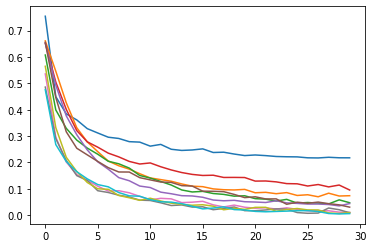

In [15]:
n_hidden=(i for i in range(1,11))
storage=dict()

for i in n_hidden:
    net=One_hidden(i)
    storage[i]=model_train(net,trainloader)
    
print(storage)

Epoch: 1 	Training Loss: 0.503640
Epoch: 2 	Training Loss: 0.217870
Epoch: 3 	Training Loss: 0.146052
Epoch: 4 	Training Loss: 0.100000
Epoch: 5 	Training Loss: 0.084249
Epoch: 6 	Training Loss: 0.068975
Epoch: 7 	Training Loss: 0.062194
Epoch: 8 	Training Loss: 0.039169
Epoch: 9 	Training Loss: 0.036561
Epoch: 10 	Training Loss: 0.043949
Epoch: 11 	Training Loss: 0.040016
Epoch: 12 	Training Loss: 0.017286
Epoch: 13 	Training Loss: 0.025541
Epoch: 14 	Training Loss: 0.019054
Epoch: 15 	Training Loss: 0.033604
Epoch: 16 	Training Loss: 0.012109
Epoch: 17 	Training Loss: 0.019407
Epoch: 18 	Training Loss: 0.016611
Epoch: 19 	Training Loss: 0.029027
Epoch: 20 	Training Loss: 0.016307
Epoch: 21 	Training Loss: 0.008720
Epoch: 22 	Training Loss: 0.023740
Epoch: 23 	Training Loss: 0.012990
Epoch: 24 	Training Loss: 0.001383
Epoch: 25 	Training Loss: 0.016354
Epoch: 26 	Training Loss: 0.021699
Epoch: 27 	Training Loss: 0.001904
Epoch: 28 	Training Loss: 0.001197
Epoch: 29 	Training Loss: 0.0

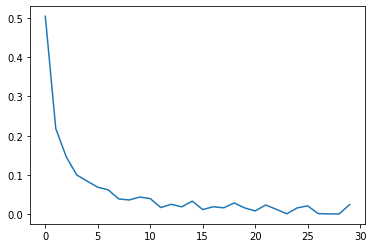

In [16]:
start_time_best=time.time()
model_best=One_hidden(10)
model_train(model_best,mainloader) # Train the model with all the instances available
end_time_best=time.time()
print(f"Training time: {end_time_best-start_time_best}s") # Total training time

In [19]:
accuracy_test(model_best,testloader) # Final accuracy of the model

Accuracy of the network for test data: 95.5 %
